<a href="https://colab.research.google.com/github/bilalProgTech/mtech-data-science/blob/master/Deep-Learning/MTech-DS-DL-BilalHungund-D013-A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
%matplotlib inline

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train/255.0, X_test/255.0

Using TensorFlow backend.


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
labels_class_name = {0:'Airplane', 
                     1:'Automobile', 
                     2:'Bird', 
                     3:'Cat', 
                     4:'Deer', 
                     5:'Dog',
                     6:'Frog', 
                     7:'Horse', 
                     8:'Ship', 
                     9:'Truck'}

<Figure size 432x288 with 0 Axes>

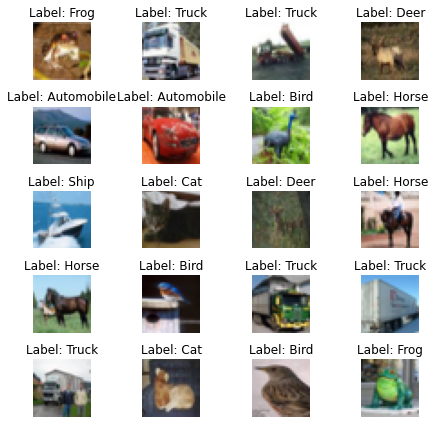

In [4]:
nrows = 5
ncols = 4

fig = plt.gcf()
plt.figure(figsize=(6,6))

for i in range(X_train[0:20].shape[0]):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    plt.title("Label: "+labels_class_name.get(y_train[0:20][i][0]))
    plt.imshow(X_train[0:20][i])
plt.tight_layout()
plt.show()

In [5]:
X_train = X_train.reshape(X_train.shape[0], 32*32*3)
X_test = X_test.reshape(X_test.shape[0], 32*32*3)

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(575, activation='relu', input_dim=32*32*3),
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 575)               1766975   
_________________________________________________________________
dense_1 (Dense)              (None, 350)               201600    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               52650     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               30200     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 2,061,985
Trainable params: 2,061,985
Non-trainable params: 0
______________________________________________

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=45, validation_data=(X_test,y_test))

Epoch 1/45
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9171 - accuracy: 0.3070 - val_loss: 1.7543 - val_accuracy: 0.3639
Epoch 2/45
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6966 - accuracy: 0.3928 - val_loss: 1.7600 - val_accuracy: 0.3676
Epoch 3/45
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6035 - accuracy: 0.4290 - val_loss: 1.5994 - val_accuracy: 0.4180
Epoch 4/45
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5385 - accuracy: 0.4508 - val_loss: 1.6118 - val_accuracy: 0.4171
Epoch 5/45
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4856 - accuracy: 0.4686 - val_loss: 1.5069 - val_accuracy: 0.4583
Epoch 6/45
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4468 - accuracy: 0.4813 - val_loss: 1.5128 - val_accuracy: 0.4674
Epoch 7/45
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4097 - accuracy: 0.4961 - val_loss: 1.6269 - val_accuracy:

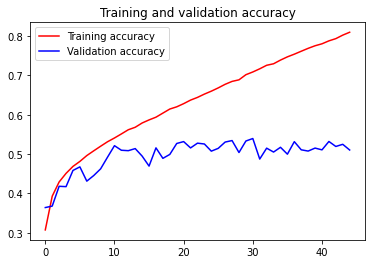

<Figure size 432x288 with 0 Axes>

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()